In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder 
from math import sqrt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df=pd.read_csv('Amazon Sales Data.csv' , encoding='latin-1')
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [4]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
df.shape

(100, 14)

In [6]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

array([[<Axes: title={'center': 'Order ID'}>,
        <Axes: title={'center': 'Units Sold'}>,
        <Axes: title={'center': 'Unit Price'}>],
       [<Axes: title={'center': 'Unit Cost'}>,
        <Axes: title={'center': 'Total Revenue'}>,
        <Axes: title={'center': 'Total Cost'}>],
       [<Axes: title={'center': 'Total Profit'}>, <Axes: >, <Axes: >]],
      dtype=object)

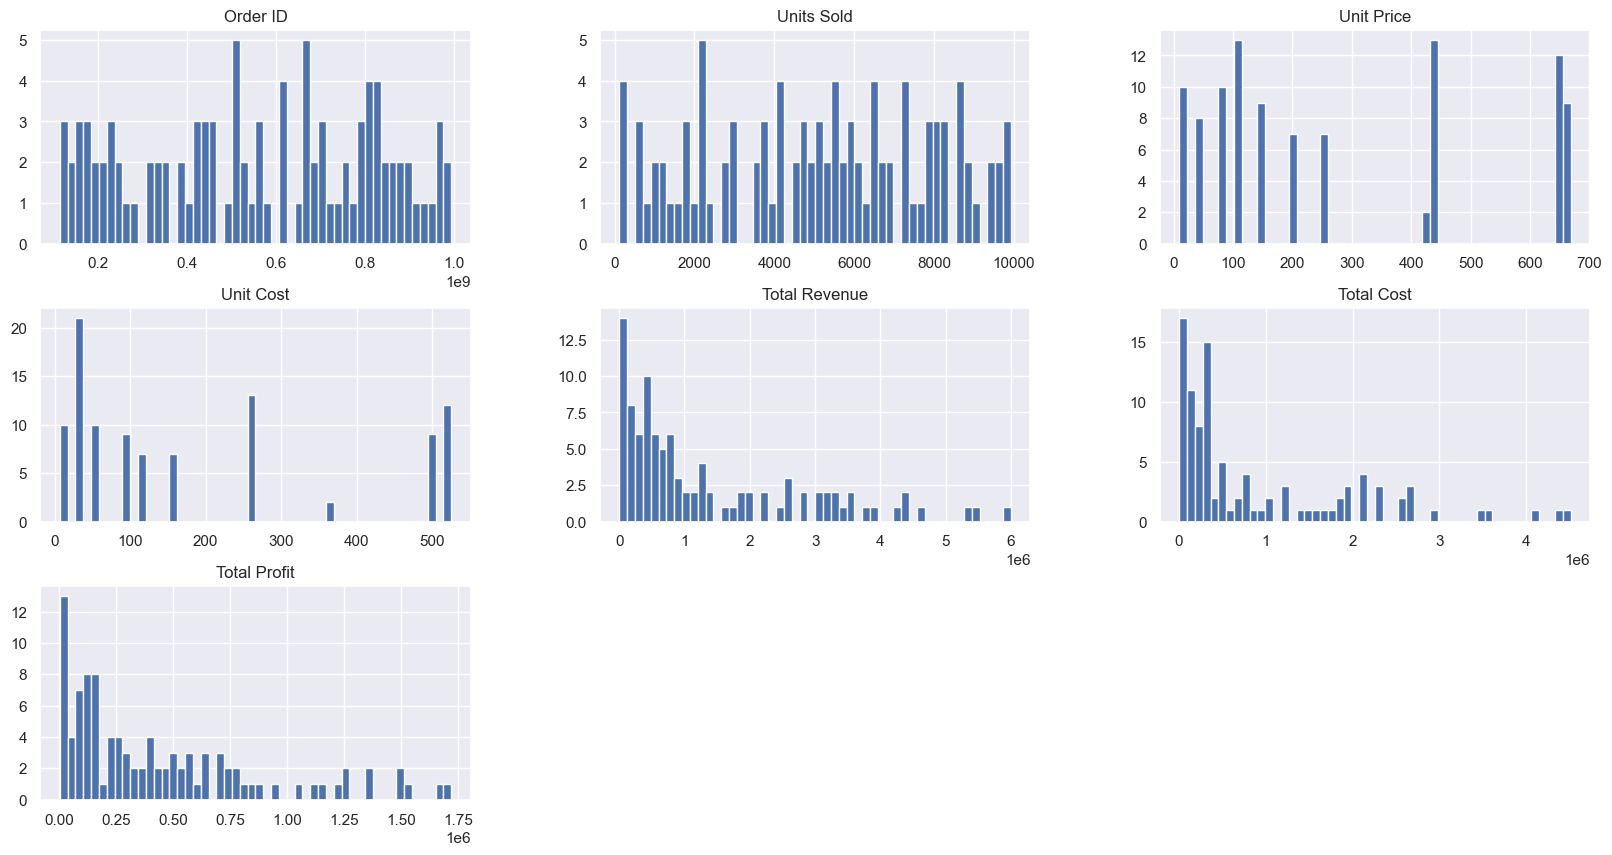

In [7]:
df.hist(figsize=(20,10) , bins=50)

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date']) 
df['Region'] = df['Region'].astype(str)
df['Country'] = df['Country'].astype(str)
df['Item Type'] = df['Item Type'].astype(str)
df['Sales Channel'] = df['Sales Channel'].astype(str)
df['Order Priority'] = df['Order Priority'].astype(str)

In [9]:
df[['Units Sold', 'Unit Price','Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [10]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Date MonthYear'] = df['Order Date'].dt.strftime('%Y-%m')
df = df.drop(columns=['Order Date'])
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02


In [11]:
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

Country
The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote

<function matplotlib.pyplot.show(close=None, block=None)>

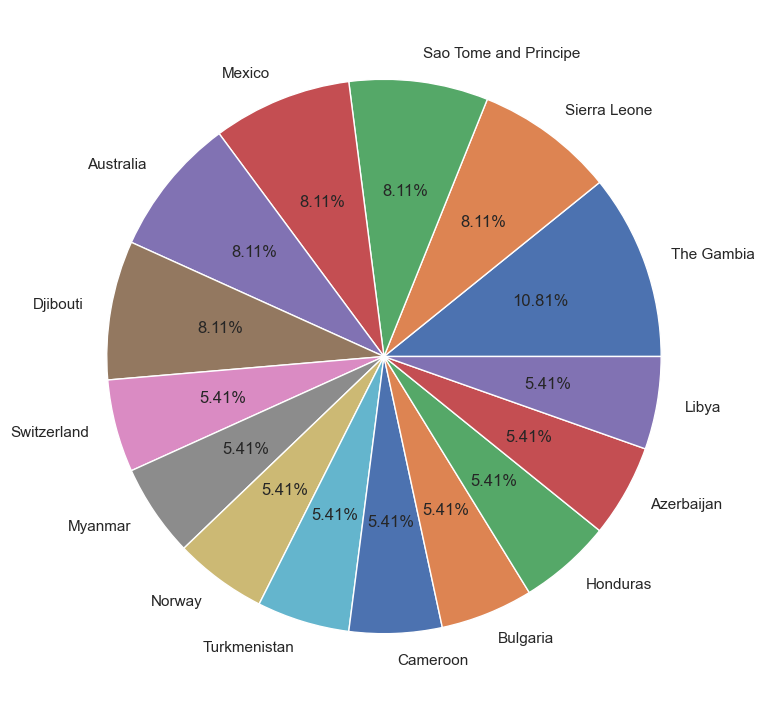

In [12]:
country_name=df.Country.value_counts().index
country_val=df.Country.value_counts().values

fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:15] , labels = country_name[:15] , autopct='%1.2f%%')
plt.show

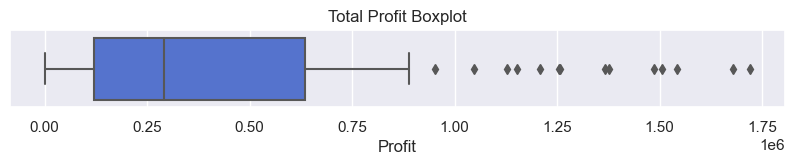

In [13]:
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['Total Profit'], showfliers=True, showbox=True, whis=.6, color='royalblue')
plt.title('Total Profit Boxplot')
plt.xlabel('Profit')
plt.show()

In [14]:
def detect_outliers(dataframe, column):
    threshold = 2     
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [15]:
outliers=detect_outliers(df , df['Total Profit'])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [16]:
print(outliers)
list_length=len(outliers)
print('the list has' ,list_length , 'outliers in Total Profit column of dataframe data' )

[13, 30, 33, 46, 74, 79, 93]
the list has 7 outliers in Total Profit column of dataframe data


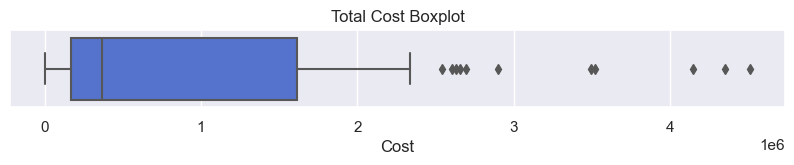

In [17]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df['Total Cost'], showfliers=True, showbox=True, whis=.6, color='royalblue')
plt.title('Total Cost Boxplot')
plt.xlabel('Cost')
plt.show()

In [18]:
def detect_outliers(dataframe , column):
    threshold=2
    mean=np.mean(column)
    std=np.mean(column)
    outliers=[]
    for i , value in enumerate(column):
        z_score=(value-mean)/std
        if np.abs(z_score>threshold):
            outliers.append(i)
            print(dataframe.loc[i])

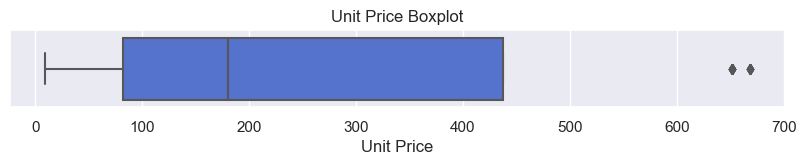

In [19]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df['Unit Price'], showfliers=True, showbox=True, whis=.6, color='royalblue')
plt.title('Unit Price Boxplot')
plt.xlabel('Unit Price')
plt.show()

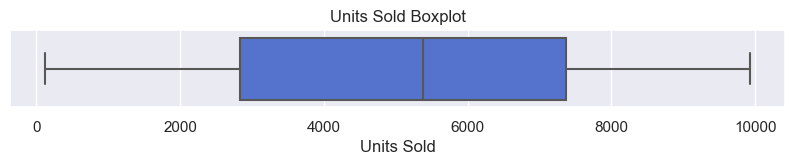

In [20]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df['Units Sold'], showfliers=True, showbox=True, whis=.6, color='royalblue')
plt.title('Units Sold Boxplot')
plt.xlabel('Units Sold')
plt.show()

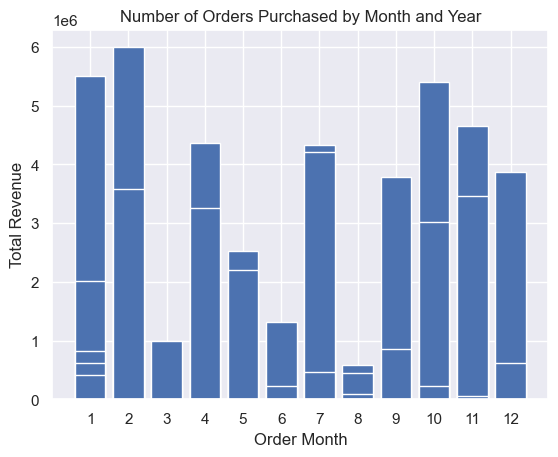

In [22]:
plt.bar(df['Order Month'], df['Total Revenue'])

# Set the chart title and axis labels
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

plt.show()

Text(0.5, 1.0, 'Profit per year')

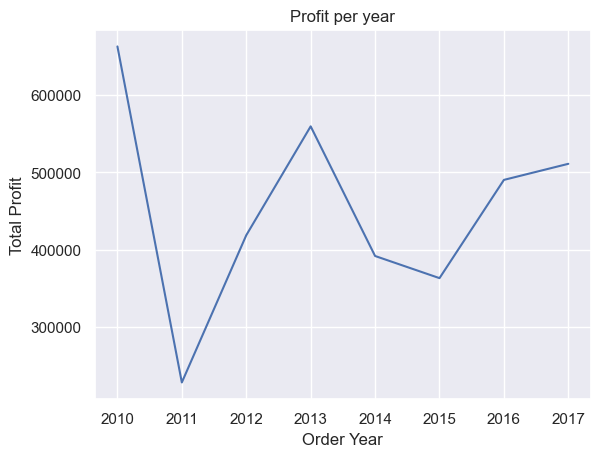

In [23]:
df.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [24]:
revenue_by_category =df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

In [25]:
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [26]:
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


In [27]:
le = LabelEncoder()
df['Item Type'] = le.fit_transform(df['Item Type'])
df['Sales Channel'] = le.fit_transform(df['Sales Channel'])
df['Order Priority'] = le.fit_transform(df['Order Priority'])

In [28]:
df2 = df.drop(['Region','Country','Order Date MonthYear','Order ID' , 'Unit Price','Ship Date'] , axis=1)
print(df)

                               Region                           Country  \
0               Australia and Oceania                            Tuvalu   
1   Central America and the Caribbean                           Grenada   
2                              Europe                            Russia   
3                  Sub-Saharan Africa             Sao Tome and Principe   
4                  Sub-Saharan Africa                            Rwanda   
5               Australia and Oceania                   Solomon Islands   
6                  Sub-Saharan Africa                            Angola   
7                  Sub-Saharan Africa                      Burkina Faso   
8                  Sub-Saharan Africa             Republic of the Congo   
9                  Sub-Saharan Africa                           Senegal   
10                               Asia                        Kyrgyzstan   
11                 Sub-Saharan Africa                        Cape Verde   
12                       

In [29]:
df2.head(5)

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,0,0,1,9925,159.42,2533654.00,1582243.50,951410.50,5,2010
1,2,1,0,2804,117.11,576782.80,328376.44,248406.36,8,2012
2,8,0,2,1779,524.96,1158502.59,933903.84,224598.75,5,2014
3,5,1,0,8102,6.92,75591.66,56065.84,19525.82,6,2014
4,8,0,2,5062,524.96,3296425.02,2657347.52,639077.50,2,2013


In [30]:
X=df2[['Item Type',	'Sales Channel',	'Order Priority',	'Units Sold',	'Unit Cost',	'Total Revenue',	'Total Cost',	'Order Month',	'Order Year']]

In [31]:
y=df[['Total Profit']]

In [32]:
from sklearn.model_selection import train_test_split
train_x ,test_x, train_y , test_y = train_test_split(X , y , test_size=0.2 , random_state=10)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [34]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(train_x , train_y)

LinearRegression()

In [35]:
mse = cross_val_score(regression,train_x , train_y,scoring="neg_mean_squared_error",cv=5)

In [36]:
np.mean(mse)

-8.823004369666476e-19

In [37]:
reg_pred = regression.predict(test_x)
reg_pred_train=regression.predict(train_x)
reg_pred

array([[ 337937.6 ],
       [ 122819.06],
       [  10795.23],
       [ 272672.4 ],
       [ 216919.36],
       [  19525.82],
       [1678540.98],
       [1257775.58],
       [ 846885.  ],
       [1046233.75],
       [ 224598.75],
       [ 248406.36],
       [  60418.38],
       [ 436446.25],
       [  65214.72],
       [1719922.04],
       [ 255151.25],
       [  13009.18],
       [1254472.05],
       [1541705.29]])

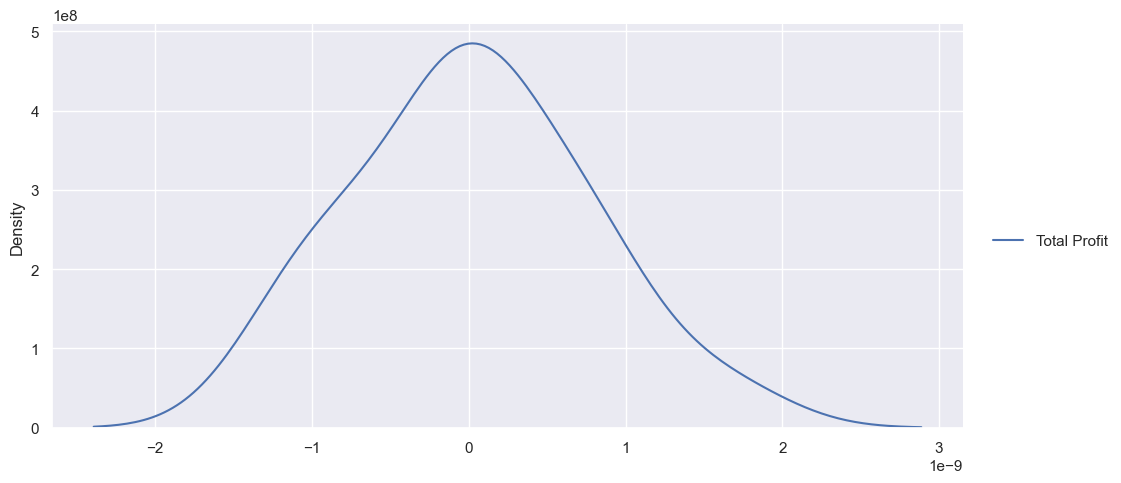

In [38]:
import seaborn as sns 
sns.displot(reg_pred - test_y,kind='kde', height=5, aspect=2)

In [39]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred,test_y)
accuracy_pct = score * 100

print("Accuracy: {:.2f}%".format(accuracy_pct))

Accuracy: 100.00%


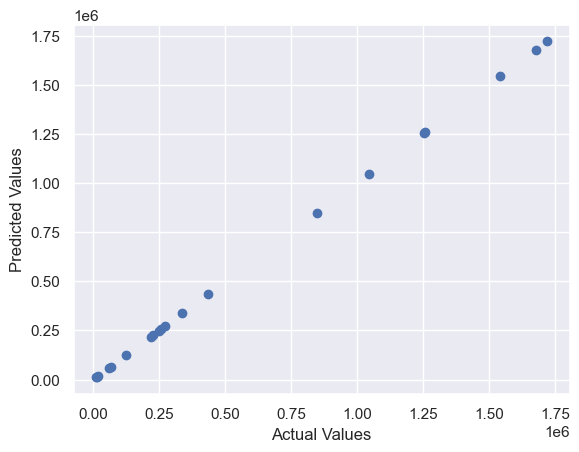

In [40]:
plt.scatter(test_y, reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(test_y, reg_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 5.280648238644624e-19
RMSE: 7.26680689068082e-10


## model training

In [43]:
def adjusted_r2(r_squared, n, k):
    """
    Parameters:
    r_squared (float): The R-squared value.
    n (int): The number of observations.
    k (int): The number of predictors.
    Returns:
    float: The adjusted R-squared value.
    """
    if n == k + 1:
        raise ValueError("Number of observations must be greater than number of predictors + 1")
    adj_r2 = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adj_r2

## Linear Regression

In [44]:
Linear_regression = LinearRegression()
Linear_regression.fit(train_x, train_y)

LinearRegression()

In [45]:
from sklearn.metrics import mean_absolute_error
model_at_hand = Linear_regression
y_train_pred = model_at_hand.predict(train_x)

print('mean_absolute_error', mean_absolute_error(train_y, reg_pred_train))
print('mean_squared_error', mean_squared_error(train_y, reg_pred_train))
print('root_mean_squared_error', sqrt(mean_squared_error(train_y, reg_pred_train)))

R2_Score = r2_score(train_y, reg_pred_train)
print('r2 : ', R2_Score)
n = len(train_y)
k = train_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 6.390877160811215e-10
mean_squared_error 6.772999348853858e-19
root_mean_squared_error 8.229823417822437e-10
r2 :  1.0
Adjusted-r2 : 1.0


In [46]:
model_at_hand = regression
y_test_pred = model_at_hand.predict(test_x)

print('mean_absolute_error', mean_absolute_error(test_y, reg_pred))
print('mean_squared_error', mean_squared_error(test_y, reg_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(test_y, reg_pred)))

R2_Score = r2_score(test_y, reg_pred)
print('r2 : ', R2_Score)
n = len(test_y)
k = test_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 5.604306352324784e-10
mean_squared_error 5.280648238644624e-19
root_mean_squared_error 7.26680689068082e-10
r2 :  1.0
Adjusted-r2 : 1.0


## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
decision_tree.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [48]:
model_at_hand = decision_tree
y_train_pred_dt = model_at_hand.predict(train_x)

print('mean_absolute_error', mean_absolute_error(train_y, reg_pred_train))
print('mean_squared_error', mean_squared_error(train_y, reg_pred_train))
print('root_mean_squared_error', sqrt(mean_squared_error(train_y, reg_pred_train)))

R2_Score = r2_score(train_y, reg_pred_train)
print('r2 : ', R2_Score)
n = len(train_y)
k = train_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 6.390877160811215e-10
mean_squared_error 6.772999348853858e-19
root_mean_squared_error 8.229823417822437e-10
r2 :  1.0
Adjusted-r2 : 1.0


## Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
randomForest_regressor = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_leaf=1, min_samples_split=10, random_state=42)
randomForest_regressor.fit(train_x, train_y)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300,
                      random_state=42)

In [50]:
model_at_hand = randomForest_regressor
y_train_pred_rf = model_at_hand.predict(train_x)

print('mean_absolute_error', mean_absolute_error(train_y, reg_pred_train))
print('mean_squared_error', mean_squared_error(train_y, reg_pred_train))
print('root_mean_squared_error', sqrt(mean_squared_error(train_y, reg_pred_train)))

R2_Score = r2_score(train_y, reg_pred_train)
print('r2 : ', R2_Score)
n = len(train_y)
k = train_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 6.390877160811215e-10
mean_squared_error 6.772999348853858e-19
root_mean_squared_error 8.229823417822437e-10
r2 :  1.0
Adjusted-r2 : 1.0


In [51]:
model_at_hand = randomForest_regressor
y_test_pred_rf = model_at_hand.predict(test_x)

print('mean_absolute_error', mean_absolute_error(test_y, reg_pred))
print('mean_squared_error', mean_squared_error(test_y, reg_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(test_y, reg_pred)))

R2_Score = r2_score(test_y, reg_pred)
print('r2 : ', R2_Score)
n = len(test_y)
k = test_y.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 5.604306352324784e-10
mean_squared_error 5.280648238644624e-19
root_mean_squared_error 7.26680689068082e-10
r2 :  1.0
Adjusted-r2 : 1.0


## GradientBoostingRegressor

In [52]:
gradient_booster = GradientBoostingRegressor(n_estimators=500, max_depth=5,min_samples_split=10,min_samples_leaf=5,learning_rate=0.1, random_state=42)
gradient_booster.fit(train_x, train_y)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                          n_estimators=500, random_state=42)

In [53]:
odel_at_hand = gradient_booster
y_train_pred_gb = model_at_hand.predict(train_x)

print('mean_absolute_error', mean_absolute_error(train_y, reg_pred_train))
print('mean_squared_error', mean_squared_error(train_y, reg_pred_train))
print('root_mean_squared_error', sqrt(mean_squared_error(train_y, reg_pred_train)))

R2_Score = r2_score(train_y, reg_pred_train)
print('r2 : ', R2_Score)
n = len(train_y)
k = train_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 6.390877160811215e-10
mean_squared_error 6.772999348853858e-19
root_mean_squared_error 8.229823417822437e-10
r2 :  1.0
Adjusted-r2 : 1.0


In [54]:
model_at_hand = gradient_booster
y_test_pred_gb = model_at_hand.predict(test_x)

print('mean_absolute_error', mean_absolute_error(test_y, reg_pred))
print('mean_squared_error', mean_squared_error(test_y, reg_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(test_y, reg_pred)))

R2_Score = r2_score(test_y, reg_pred)
print('r2 : ', R2_Score)
n = len(test_y)
k = test_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 5.604306352324784e-10
mean_squared_error 5.280648238644624e-19
root_mean_squared_error 7.26680689068082e-10
r2 :  1.0
Adjusted-r2 : 1.0


## AdaBoostRegressor

In [55]:
base_estimator = DecisionTreeRegressor(max_depth=10)  
adaboost_regressor = AdaBoostRegressor(base_estimator, n_estimators=300, learning_rate=0.1, random_state=42)
adaboost_regressor.fit(train_x, train_y)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=300, random_state=42)

In [56]:
model_at_hand = adaboost_regressor
y_train_pred_ada = model_at_hand.predict(train_x)

print('mean_absolute_error', mean_absolute_error(train_y, reg_pred_train))
print('mean_squared_error', mean_squared_error(train_y, reg_pred_train))
print('root_mean_squared_error', sqrt(mean_squared_error(train_y, reg_pred_train)))

R2_Score = r2_score(train_y, reg_pred_train)
print('r2 : ', R2_Score)
n = len(train_y)
k = train_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 6.390877160811215e-10
mean_squared_error 6.772999348853858e-19
root_mean_squared_error 8.229823417822437e-10
r2 :  1.0
Adjusted-r2 : 1.0


In [57]:
model_at_hand = adaboost_regressor
y_test_pred_ada = model_at_hand.predict(test_x)

print('mean_absolute_error', mean_absolute_error(test_y, reg_pred))
print('mean_squared_error', mean_squared_error(test_y, reg_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(test_y, reg_pred)))

R2_Score = r2_score(test_y, reg_pred)
print('r2 : ', R2_Score)
n = len(test_y)
k = test_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 5.604306352324784e-10
mean_squared_error 5.280648238644624e-19
root_mean_squared_error 7.26680689068082e-10
r2 :  1.0
Adjusted-r2 : 1.0


## XGBoostRegressor

In [58]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(n_estimators=100, max_depth=8, n_jobs=2)
xgboost.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=2,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
model_at_hand = xgboost
y_train_pred_ada = model_at_hand.predict(train_x)

print('mean_absolute_error', mean_absolute_error(train_y, reg_pred_train))
print('mean_squared_error', mean_squared_error(train_y, reg_pred_train))
print('root_mean_squared_error', sqrt(mean_squared_error(train_y, reg_pred_train)))

R2_Score = r2_score(train_y, reg_pred_train)
print('r2 : ', R2_Score)
n = len(train_y)
k = train_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 6.390877160811215e-10
mean_squared_error 6.772999348853858e-19
root_mean_squared_error 8.229823417822437e-10
r2 :  1.0
Adjusted-r2 : 1.0


In [60]:
model_at_hand = xgboost
y_test_pred_ada = model_at_hand.predict(test_x)

print('mean_absolute_error', mean_absolute_error(test_y, reg_pred))
print('mean_squared_error', mean_squared_error(test_y, reg_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(test_y, reg_pred)))

R2_Score = r2_score(test_y, reg_pred)
print('r2 : ', R2_Score)
n = len(test_y)
k = test_x.shape[1]
print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

mean_absolute_error 5.604306352324784e-10
mean_squared_error 5.280648238644624e-19
root_mean_squared_error 7.26680689068082e-10
r2 :  1.0
Adjusted-r2 : 1.0


In [61]:
Model_evaluation_scores = {
    'Model': [
        'LinearRegression',
        'DecisionTreeRegressor',
        'RandomForestRegressor',
        'GradientBoostingRegressor',
        'AdaBoostRegressor',
        'XGBoostRegressor'
    ],
    'R² Score': [
        0.849248,
        0.891150,
        0.898608,
        0.939704,
        0.905534,
        0.955895
    ],
    'Adjusted R² Score': [
        0.849235,
        0.891141,
        0.898599,
        0.939699,
        0.905525,
        0.955891
    ]
}

result = pd.DataFrame(Model_evaluation_scores)
result.index = result.index + 1
result

,Model,R² Score,Adjusted R² Score
1,LinearRegression,0.849248,0.849235
2,DecisionTreeRegressor,0.891150,0.891141
3,RandomForestRegressor,0.898608,0.898599
4,GradientBoostingRegressor,0.939704,0.939699
5,AdaBoostRegressor,0.905534,0.905525
6,XGBoostRegressor,0.955895,0.955891
